In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [49]:
data = pd.read_csv('articles.csv')
main_data = data[:50]

In [50]:
docs = main_data['text']
docs = docs.str.lower()
docs = docs.str.split()

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

lemma = WordNetLemmatizer()
stemm = PorterStemmer()

In [52]:
import nltk

#### Lemmatisation

In [53]:
common_stop_word = nltk.corpus.stopwords.words('english')
custom_stop_word = []
stop = np.hstack([common_stop_word,custom_stop_word])

In [54]:
words_lst = []
words_cln = []
for row in docs:
    rowword = [lemma.lemmatize(i) for i in row if i not in stop]
    words_cln.append(rowword)
    words_lst.extend(rowword)

In [55]:
words_all = pd.Series(words_lst)

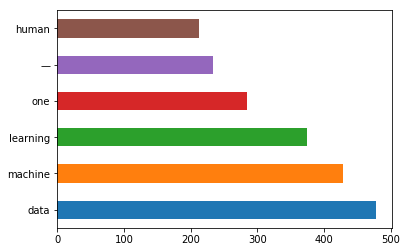

In [56]:
words_all.value_counts().head(6).plot.barh()

#### Stemming

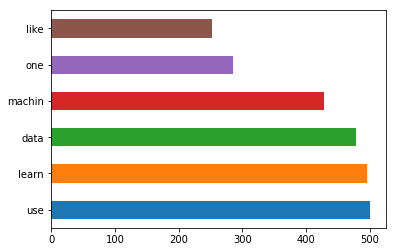

In [20]:
words_lst = []
words_cln = []
for row in docs:
    rowword = [stemm.stem(i) for i in row if i not in stop]
    words_cln.append(rowword)
    words_lst.extend(rowword)

words_all = pd.Series(words_lst)

words_all.value_counts().head(6).plot.barh()

#### POS tagging

In [21]:
text = main_data['text']
text = text.str.split()

In [22]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [57]:
tagged = nltk.pos_tag(words_all)

In [58]:
print(tagged[:10])

[('oh,', 'JJ'), ('headline', 'NN'), ('blared:', 'NN'), ('chatbots', 'NNS'), ('next', 'IN'), ('big', 'JJ'), ('thing.', 'NNS'), ('hope', 'VBP'), ('sky', 'JJ'), ('high.', 'JJ')]


#### Topic modeling

In [59]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

In [65]:
from gensim import models

In [60]:
dictionary = Dictionary(words_cln)
print(dictionary)

Dictionary(12240 unique tokens: ['&', '(dating', '(for', '(guis)', '(guis).']...)


In [61]:
len(dictionary.token2id)

12240

###### Bag of words

In [64]:
corpus = [dictionary.doc2bow(words_cln) for words_cln in words_cln]
# print(corpus[0])

In [72]:
tfidf = models.TfidfModel(corpus)

In [73]:
hdpmodel = HdpModel(corpus, id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.008*human + 0.007*may + 0.005*simulation + 0.005*output + 0.005*input + 0.005*value + 0.005*would + 0.004*process + 0.004*one + 0.004*u + 0.004*kernel + 0.003*feature + 0.003*simulated + 0.003*u-maximizer + 0.003*utility + 0.003*could + 0.003*pixel + 0.003*define + 0.003*convolution + 0.003*moral'),
 (1,
  '0.010*house + 0.010*learning + 0.009*machine + 0.008*data + 0.006*function + 0.005*weight + 0.005*could + 0.005*get + 0.005*problem + 0.005*price + 0.005*algorithm + 0.004*way + 0.004*like + 0.004*part + 0.004*it’s + 0.004*work + 0.004*would + 0.004*every + 0.004*really + 0.003*solve'),
 (2,
  '0.009*neural + 0.008*network + 0.007*image + 0.007*part + 0.006*data + 0.005*model + 0.004*machine + 0.004*like + 0.004*lot + 0.004*one + 0.004*level + 0.004*really + 0.003*algorithm + 0.003*make + 0.003*it’s + 0.003*let’s + 0.003*letter + 0.003*idea + 0.003*recognize + 0.003*we’ll'),
 (3,
  '0.008*machine + 0.007*learning + 0.005*data + 0.004*it’s + 0.004*even + 0.004*like + 0.004*

In [79]:
topic_info = hdpmodel.print_topics(num_topics=5, num_words=7)

In [80]:
topic_info

[(0,
  '0.008*human + 0.007*may + 0.005*simulation + 0.005*output + 0.005*input + 0.005*value + 0.005*would'),
 (1,
  '0.010*house + 0.010*learning + 0.009*machine + 0.008*data + 0.006*function + 0.005*weight + 0.005*could'),
 (2,
  '0.009*neural + 0.008*network + 0.007*image + 0.007*part + 0.006*data + 0.005*model + 0.004*machine'),
 (3,
  '0.008*machine + 0.007*learning + 0.005*data + 0.004*it’s + 0.004*even + 0.004*like + 0.004*job'),
 (4,
  '0.009*face + 0.005*one + 0.005*learning + 0.004*machine + 0.004*image + 0.004*really + 0.004*step')]

In [82]:
ldamodel = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.008*"machine" + 0.007*"learning" + 0.006*"data" + 0.005*"one" + 0.004*"—" + 0.004*"like" + 0.003*"would" + 0.003*"get" + 0.003*"way" + 0.003*"it’s"'),
 (1,
  '0.007*"data" + 0.006*"machine" + 0.005*"learning" + 0.004*"—" + 0.004*"one" + 0.003*"human" + 0.003*"like" + 0.003*"use" + 0.003*"new" + 0.003*"also"'),
 (2,
  '0.007*"data" + 0.007*"machine" + 0.005*"learning" + 0.004*"one" + 0.003*"human" + 0.003*"like" + 0.003*"—" + 0.003*"use" + 0.003*"many" + 0.003*"get"'),
 (3,
  '0.007*"machine" + 0.006*"data" + 0.005*"learning" + 0.004*"one" + 0.004*"human" + 0.004*"—" + 0.004*"like" + 0.004*"would" + 0.003*"it’s" + 0.003*"way"'),
 (4,
  '0.010*"data" + 0.006*"learning" + 0.005*"machine" + 0.005*"one" + 0.004*"feature" + 0.003*"model" + 0.003*"using" + 0.003*"also" + 0.003*"human" + 0.003*"use"')]

In [89]:
ldamodel.get_document_topics(dictionary.doc2bow(words_cln[30]))

[(4, 0.9977891)]

In [91]:
main_data['topics'] = [ldamodel.get_document_topics(dictionary.doc2bow(words_cln))[0][0] for words_cln in words_cln]

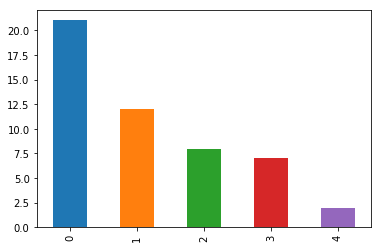

In [92]:
main_data.topics.value_counts().plot.bar()

In [93]:
main_data.topics.value_counts()

0    21
1    12
2     8
3     7
4     2
Name: topics, dtype: int64

In [95]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.006235 -0.003246       1        1  24.048319
0     -0.001490  0.007968       2        1  23.548538
1      0.008685 -0.002008       3        1  22.184893
4     -0.002073 -0.003797       4        1  16.286539
2      0.001113  0.001083       5        1  13.931714, topic_info=      Category        Freq         Term       Total  loglift  logprob
term                                                                 
942    Default  378.000000         data  378.000000  30.0000  30.0000
1384   Default  118.000000      feature  118.000000  29.0000  29.0000
1849   Default   97.000000      network   97.000000  28.0000  28.0000
283    Default   47.000000         face   47.000000  27.0000  27.0000
474    Default  119.000000         many  119.000000  26.0000  26.0000
462    Default  353.000000      machine  353.000000  25.0000  25.0000
1351   Default   75.000000         deep   75.000000  24.0000  24.0000
803    Default  136.000000        using  136.000000  23.0000  23.0000
1483   Default  145.000000        model  145.000000  22.0000  22.0000
1494   Default   86.000000       neural   86.000000  21.0000  21.0000
328    Default  129.000000          get  129.000000  20.0000  20.0000
397    Default   51.000000        input   51.000000  19.0000  19.0000
435    Default  306.000000     learning  306.000000  18.0000  18.0000
45     Default  139.000000         also  139.000000  17.0000  17.0000
1369   Default   38.000000  engineering   38.000000  16.0000  16.0000
1889   Default   88.000000       really   88.000000  15.0000  15.0000
990    Default   85.000000     function   85.000000  14.0000  14.0000
534    Default  232.000000          one  232.000000  13.0000  13.0000
1218   Default   92.000000        value   92.000000  12.0000  12.0000
370    Default  174.000000        human  174.000000  11.0000  11.0000
1145   Default   66.000000      science   66.000000  10.0000  10.0000
799    Default  150.000000          use  150.000000   9.0000   9.0000
520    Default  124.000000          new  124.000000   8.0000   8.0000
517    Default  120.000000         need  120.000000   7.0000   7.0000
726    Default   83.000000         take   83.000000   6.0000   6.0000
168    Default   99.000000     computer   99.000000   5.0000   5.0000
434    Default   82.000000        learn   82.000000   4.0000   4.0000
1061   Default   91.000000          may   91.000000   3.0000   3.0000
740    Default   58.000000         term   58.000000   2.0000   2.0000
11299  Default   46.000000          pin   46.000000   1.0000   1.0000
...        ...         ...          ...         ...      ...      ...
520     Topic5   19.242893          new  124.167542   0.1065  -5.9529
726     Topic5   13.962708         take   83.417511   0.1835  -6.2736
152     Topic5    9.289580         come   50.668610   0.2746  -6.6811
650     Topic5    6.218876    scientist   30.725349   0.3735  -7.0825
370     Topic5   24.411304        human  174.267151   0.0055  -5.7150
435     Topic5   37.217682     learning  306.553711  -0.1376  -5.2933
221     Topic5   16.368423    different  107.807701   0.0860  -6.1147
1351    Topic5   12.395511         deep   75.824783   0.1599  -6.3927
442     Topic5   23.360374         like  172.865601  -0.0305  -5.7590
799     Topic5   20.957947          use  150.967682  -0.0035  -5.8675
685     Topic5    9.291674    something   52.643471   0.2366  -6.6809
1494    Topic5   13.574039       neural   86.244614   0.1220  -6.3019
1043    Topic5    9.712922        let’s   55.885986   0.2211  -6.6366
309     Topic5   11.419909        first   69.800766   0.1607  -6.4747
1483    Topic5   19.699089        model  145.552551  -0.0290  -5.9295
534     Topic5   27.716034          one  232.230743  -0.1547  -5.5880
842     Topic5   20.166248        would  159.670761  -0.0981  -5.9060
1218    Topic5   13.722994        value   92.848022   0.0591  -6.2910
853     T

In [96]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [98]:
documents = main_data.text.tolist()

In [102]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [108]:
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [109]:
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [113]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

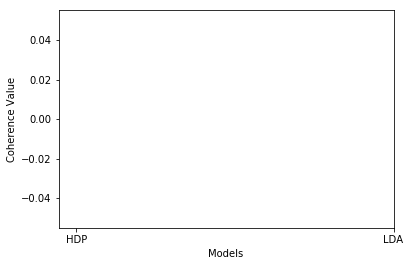

In [114]:
evaluate_bar_graph([hdp_coherence, lda_coherence], ['HDP', 'LDA'])